# Задание
1. Загрузите данные, проверьте число наблюдений и столбцов, типы данных, наличие пропущенных значений, какие уникальные значения встречаются.


2. Постройте график распределения числа показов (Impressions) для каждой рекламы, прологарифмировав значения.


3. Создайте новую колонку c CTR. Посмотрите на описательные статистики и распределение.


4. Проанализируйте CTR с разбивкой по рекламной кампании.


5. Посчитайте стоимость за клик пользователя по объявлению (CPC). Изучите полученные значения, используя меры центральной тенденции и меры изменчивости. 


6. Визуализируйте CPC с разбивкой по полу пользователей, которым были показаны объявления. 


7. Посчитайте конверсию из клика в покупку.

# 1

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('conversion.csv').dropna()

In [23]:
df.shape

(1143, 11)

In [24]:
df.dtypes

ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
dtype: object

In [25]:
df.nunique()

ad_id                  1143
xyz_campaign_id           3
fb_campaign_id          691
age                       4
gender                    2
interest                 40
Impressions            1130
Clicks                  183
Spent                   869
Total_Conversion         32
Approved_Conversion      16
dtype: int64

In [26]:
df.head(3)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0


# 2

C:\Temp\ipykernel_2032\1635138429.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df.groupby('fb_campaign_id').Impressions.sum()), kde=False, bins=50)


<Axes: xlabel='Impressions'>

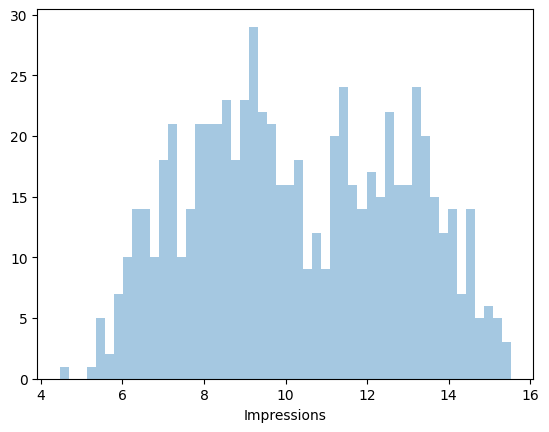

In [30]:
sns.distplot(np.log(df.groupby('fb_campaign_id').Impressions.sum()), kde=False, bins=50)

# 3

In [31]:
df['CTR'] = df['Clicks'] / df['Impressions']
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.000235
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.000242


In [32]:
df.CTR.describe()

count    1143.000000
mean        0.000164
std         0.000115
min         0.000000
25%         0.000100
50%         0.000160
75%         0.000234
max         0.001059
Name: CTR, dtype: float64

In [49]:
df[['ad_id','CTR']].sort_values('CTR').tail(1)

,ad_id,CTR
150,738637,0.001059


# 4

In [72]:
df.xyz_campaign_id.unique()

array([ 916,  936, 1178], dtype=int64)

C:\Temp\ipykernel_2032\3713450996.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.query('xyz_campaign_id == 916').CTR, bins=20)


<Axes: xlabel='CTR', ylabel='Density'>

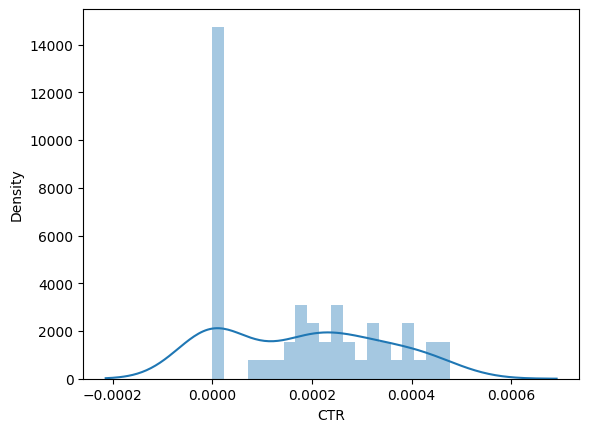

In [75]:
sns.distplot(df.query('xyz_campaign_id == 916').CTR, bins=20)

C:\Temp\ipykernel_2032\2881437983.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.query('xyz_campaign_id == 936').CTR, bins=20)


<Axes: xlabel='CTR', ylabel='Density'>

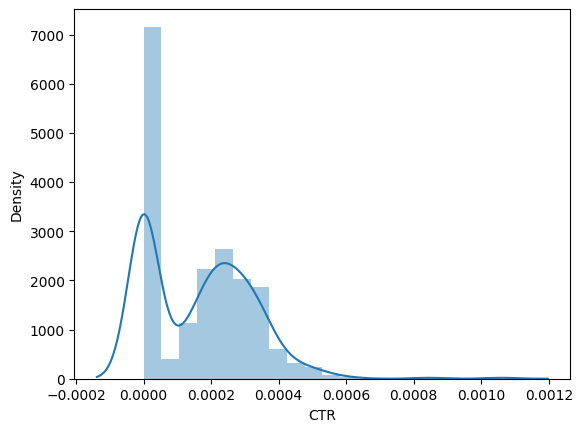

In [76]:
sns.distplot(df.query('xyz_campaign_id == 936').CTR, bins=20)

C:\Temp\ipykernel_2032\3520386909.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.query('xyz_campaign_id == 1178').CTR, bins=20)


<Axes: xlabel='CTR', ylabel='Density'>

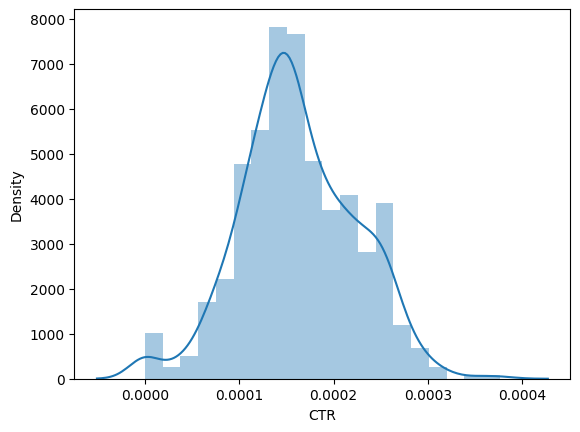

In [77]:
sns.distplot(df.query('xyz_campaign_id == 1178').CTR, bins=20)

# 5

In [78]:
df['CPC'] = df.Spent / df.Clicks

In [79]:
df.CPC.describe()

count    936.000000
mean       1.499347
std        0.232879
min        0.180000
25%        1.390000
50%        1.498273
75%        1.644364
max        2.212000
Name: CPC, dtype: float64

# 7

C:\Temp\ipykernel_2032\2892030309.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.query('gender == "M"').CPC, bins=20)
C:\Temp\ipykernel_2032\2892030309.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.query('gender == "F"').CPC, bins=20)


<Axes: xlabel='CPC', ylabel='Density'>

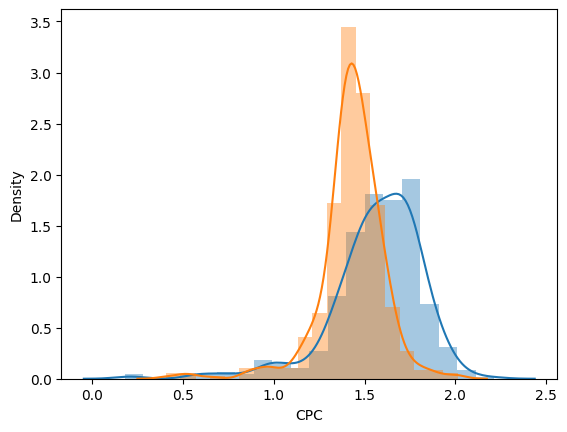

In [80]:
sns.distplot(df.query('gender == "M"').CPC, bins=20)
sns.distplot(df.query('gender == "F"').CPC, bins=20)

# 8

In [82]:
df['CR'] = (df.Approved_Conversion / df.Clicks)*100

In [86]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC,CR
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136,1.43,100.0
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112,0.91,0.0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000,NaN,NaN
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.000235,1.25,0.0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.000242,1.29,100.0
